In [24]:
import os
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

# Constants

In [25]:
lead_times = [0, 2, 4, 6, 8]
experiment_names = ["SIC_Attention_Res_UNet", "SIC_Attention_UNet", "SIC_Res_UNet", "SIC_UNet"]
#
date_min = "20220101"
date_max = "20221231"
period = date_min + "_" + date_max
#
path_output = "/lustre/storeB/users/cyrilp/COSI/Figures/Article/" 
if os.path.isdir(path_output) == False:
    os.system("mkdir -p " + path_output)
#
sizefont = 25
sizefont_legend = 18
linewidth = 3
alpha = 1

# Functions

In [26]:
def read_dataset(experiment_names, period, lead_times):    
    Scores = {}
    #
    for exp in experiment_names:
        for lt, leadtime in enumerate(lead_times):
            path_exp = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/" + exp + "/lead_time_" + str(leadtime) + "_days/scores/"
            Dataset = pd.read_csv(path_exp + "Scores_" + period + ".txt", delimiter = "\t")
            #
            for var in Dataset:
                if lt == 0:
                    Scores[exp + "_" + var] = np.full(len(lead_times), np.nan)
                    Scores[exp + "_" + var][lt] = np.mean(Dataset[var])
                else:
                    Scores[exp + "_" + var][lt] = np.mean(Dataset[var])
    #
    return(Scores)

In [27]:
def calculate_wilcoxon(experiment_1, experiment_2, period, lead_times, metrics = ["RMSE", "IIEElength_15"]):
    Wilcoxon = {}
    Pvalue = {}
    for met in metrics:
        Wilcoxon[met] = np.full(len(lead_times), np.nan)
        Pvalue[met] = np.full(len(lead_times), np.nan)
    #
    experiments = [experiment_1, experiment_2]
    for lt, leadtime in enumerate(lead_times):
        Datasets = {}
        for exp in experiments:
            path_exp = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/" + exp + "/lead_time_" + str(leadtime) + "_days/scores/"
            Datasets[exp] = pd.read_csv(path_exp + "Scores_" + period + ".txt", delimiter = "\t")
        #
        for met in metrics:
            Wilcoxon[met][lt], Pvalue[met][lt] = wilcoxon(Datasets[experiment_1][met + "_ML"], Datasets[experiment_2][met + "_ML"], zero_method = "wilcox", correction = False, alternative = "two-sided", mode = "auto")
    #
    return(Wilcoxon, Pvalue)

In [28]:
def make_figure_absolute_several_ice_edges(Scores, experiment_names, lead_times, sizefont, sizefont_legend, saving = False):
    #
    colorscale = plt.cm.tab20b
    colors = colorscale(np.linspace(0, 1, len(experiment_names) + 1))
    lead_times_fig = [str(x) for x in (np.array(lead_times) + 1)]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 4, figsize = (30, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(131)
    for v, var in enumerate(experiment_names):
        RMSE = Scores[var + "_RMSE_ML"]
        label_str = var.replace("_T4", "_TOPAZ4").replace("Res", "Residual").replace("_", " ").replace("SIC", "").replace("UNet", "U-Net")
        l = ax.plot(lead_times_fig, RMSE, color = colors[v], label = label_str, linewidth = linewidth, alpha = alpha)
    ax.grid()
    ax.set_title("RMSE", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("RMSE (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    #ax.set_ylim([])
    #
    ax = plt.subplot(132)
    for v, var in enumerate(experiment_names):
        IIEElength = 0.001 * (np.array(Scores[var + "_IIEElength_10_ML"]))
        l = ax.plot(lead_times_fig, IIEElength , color = colors[v], label = var.replace("_T4", "_TOPAZ4"), linewidth = linewidth, alpha = alpha)
    ax.grid()
    ax.set_title("Ice edge distance error (10 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    #ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    #
    ax = plt.subplot(133)
    for v, var in enumerate(experiment_names):
        IIEElength = 0.001 * (np.array(Scores[var + "_IIEElength_20_ML"]))
        l = ax.plot(lead_times_fig, IIEElength , color = colors[v], label = var.replace("_T4", "_TOPAZ4"), linewidth = linewidth, alpha = alpha)
    ax.grid()
    ax.set_title("Ice edge distance error (20 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    #ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    #
    if saving == True:
        plt.savefig(path_output + "Different_architectures_" + period + ".png", bbox_inches = "tight")
    else:
        plt.show()
#
def make_figure_absolute(Scores, experiment_names, lead_times, sizefont, sizefont_legend, saving = False):
    #
    colorscale = plt.cm.tab20b
    colors = colorscale(np.linspace(0, 1, len(experiment_names) + 1))
    lead_times_fig = [str(x) for x in (np.array(lead_times) + 1)]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 2, figsize = (25, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(121)
    for v, var in enumerate(experiment_names):
        RMSE = Scores[var + "_RMSE_ML"]
        label_str = var.replace("_T4", "_TOPAZ4").replace("Res", "Residual").replace("_", " ").replace("SIC", "").replace("UNet", "U-Net")
        l = ax.plot(lead_times_fig, RMSE, color = colors[v], label = label_str, linewidth = linewidth, alpha = alpha)
    #
    #l = ax.plot(lead_times_fig, Scores["SIC_Attention_Res_UNet_RMSE_Persistence"], color = "k", label = "Persistence", linewidth = linewidth, alpha = alpha)
    #l = ax.plot(lead_times_fig, Scores["SIC_Attention_Res_UNet_RMSE_Anomaly_persistence"], color = "darkgrey", label = "Anomaly persistence", linewidth = linewidth, alpha = alpha)
    #l = ax.plot(lead_times_fig, Scores["SIC_Attention_Res_UNet_RMSE_TOPAZ"], color = "r", label = "TOPAZ4", linewidth = linewidth, alpha = alpha)
    #l = ax.plot(lead_times_fig, Scores["SIC_Attention_Res_UNet_RMSE_TOPAZ_bias_corrected"], color = "m", label = "TOPAZ4 bias corrected", linewidth = linewidth, alpha = alpha)
    ax.grid(alpha = 0.4)
    ax.set_title("RMSE", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("RMSE (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    ax.text(-0.1,-0.05, "a)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #ax.set_ylim([0, 10])
    #
    ax = plt.subplot(122)
    for v, var in enumerate(experiment_names):
        IIEElength = 0.001 * (np.array(Scores[var + "_IIEElength_15_ML"]))
        l = ax.plot(lead_times_fig, IIEElength , color = colors[v], label = var.replace("_T4", "_TOPAZ4"), linewidth = linewidth, alpha = alpha)
    #
    #l = ax.plot(lead_times_fig, 0.001 * Scores["SIC_Attention_Res_UNet_IIEElength_10_Persistence"], color = "k", label = "Persistence", linewidth = linewidth, alpha = alpha)
    #l = ax.plot(lead_times_fig, 0.001 * Scores["SIC_Attention_Res_UNet_IIEElength_10_Anomaly_persistence"], color = "darkgrey", label = "Anomaly persistence", linewidth = linewidth, alpha = alpha)
    #l = ax.plot(lead_times_fig, 0.001 * Scores["SIC_Attention_Res_UNet_IIEElength_10_TOPAZ"], color = "r", label = "TOPAZ4", linewidth = linewidth, alpha = alpha)
    #l = ax.plot(lead_times_fig, 0.001 * Scores["SIC_Attention_Res_UNet_IIEElength_10_TOPAZ_bias_corrected"], color = "m", label = "TOPAZ4 bias corrected", linewidth = linewidth, alpha = alpha)
    ax.grid(alpha = 0.4)
    ax.set_title("Ice edge distance error", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.text(-0.1,-0.05, "b)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #ax.set_ylim([0, 23.7])
    #ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    #
    if saving == True:
        plt.savefig(path_output + "Different_architectures_" + period + ".png", bbox_inches = "tight")
    else:
        plt.show()

# Data processing 

RMSE Attention Residual U-Net:  6.791267013972248
RMSE Attention U-Net:  7.086315159808582
RMSE Residual U-Net:  6.972559485283526
RMSE U-Net:  6.9410979865879225
IIEElength 15 % Attention Residual U-Net:  15437.541550231272
IIEElength 15 % Attention U-Net:  16548.104875082026
IIEElength 15 % Residual U-Net:  15196.279880283608
IIEElength 15 % U-Net:  15254.737987548215
P value not significant Attention_Res_UNet_vs_Attention_UNet RMSE lead time: 1 days / P value:  0.712312428725522
P value not significant Attention_Res_UNet_vs_Attention_UNet RMSE lead time: 9 days / P value:  0.28561858506541293
P value not significant Attention_Res_UNet_vs_UNet IIEElength_15 lead time: 1 days / P value:  0.23363381514310466


<Figure size 640x480 with 0 Axes>

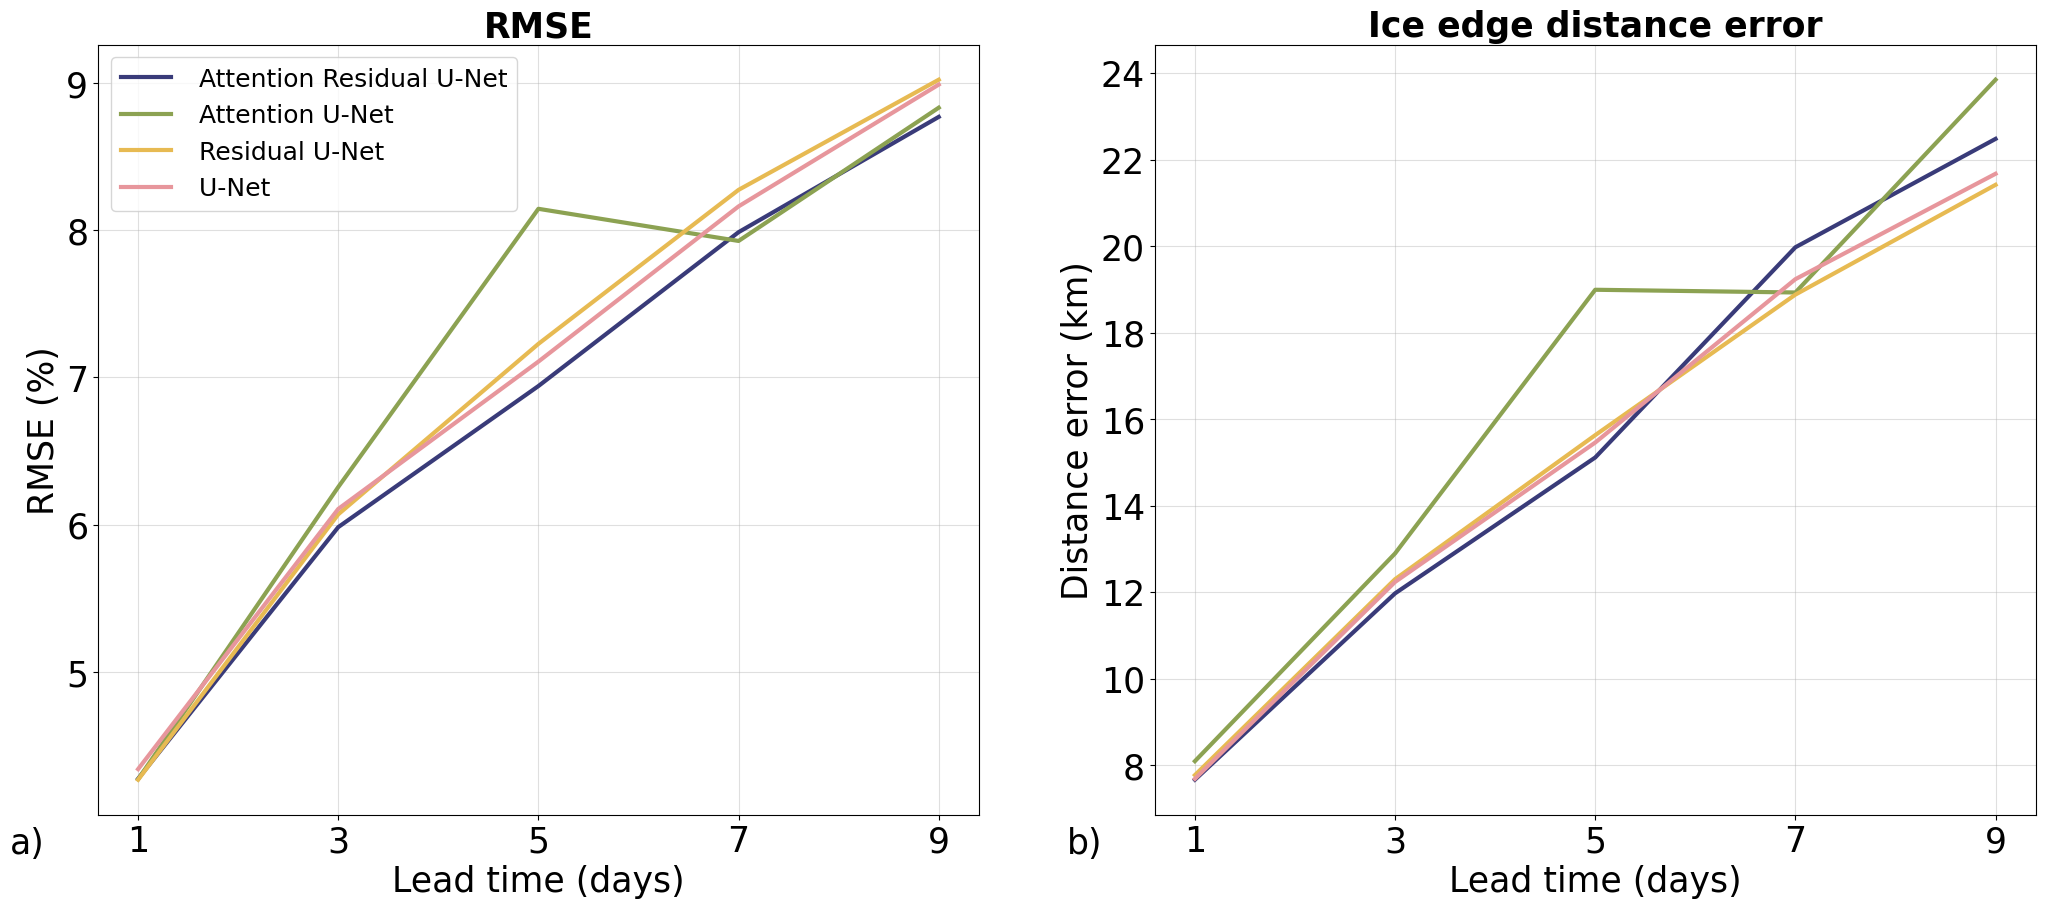

In [29]:
Scores = read_dataset(experiment_names, period, lead_times)
make_figure_absolute(Scores, experiment_names, lead_times, sizefont, sizefont_legend, saving = True)
#
Wilcoxon = {}
Pvalues = {}
#
Wilcoxon["Attention_Res_UNet_vs_Attention_UNet"], Pvalues["Attention_Res_UNet_vs_Attention_UNet"] = calculate_wilcoxon("SIC_Attention_Res_UNet", "SIC_Attention_UNet", period, lead_times, metrics = ["RMSE", "IIEElength_15"])
Wilcoxon["Attention_Res_UNet_vs_Res_UNet"], Pvalues["Attention_Res_UNet_vs_Res_UNet"] = calculate_wilcoxon("SIC_Attention_Res_UNet", "SIC_Res_UNet", period, lead_times, metrics = ["RMSE", "IIEElength_15"])
Wilcoxon["Attention_Res_UNet_vs_UNet"], Pvalues["Attention_Res_UNet_vs_UNet"] = calculate_wilcoxon("SIC_Attention_Res_UNet", "SIC_UNet", period, lead_times, metrics = ["RMSE", "IIEElength_15"])
#
print("RMSE Attention Residual U-Net: ", np.mean(Scores["SIC_Attention_Res_UNet_RMSE_ML"]))
print("RMSE Attention U-Net: ", np.mean(Scores["SIC_Attention_UNet_RMSE_ML"]))
print("RMSE Residual U-Net: ", np.mean(Scores["SIC_Res_UNet_RMSE_ML"]))
print("RMSE U-Net: ", np.mean(Scores["SIC_UNet_RMSE_ML"]))
print("IIEElength 15 % Attention Residual U-Net: ", np.mean(Scores["SIC_Attention_Res_UNet_IIEElength_15_ML"]))
print("IIEElength 15 % Attention U-Net: ", np.mean(Scores["SIC_Attention_UNet_IIEElength_15_ML"]))
print("IIEElength 15 % Residual U-Net: ", np.mean(Scores["SIC_Res_UNet_IIEElength_15_ML"]))
print("IIEElength 15 % U-Net: ", np.mean(Scores["SIC_UNet_IIEElength_15_ML"]))
#
for exp in Pvalues:
    for met in ["RMSE", "IIEElength_15"]:
        for lt in range(0, len(lead_times)):
            p_val = Pvalues[exp][met][lt]
            if p_val > 0.05:
                print("P value not significant", exp, met, "lead time:", lead_times[lt] + 1, "days / P value: ", p_val)

In [30]:
np.mean(Scores["SIC_Attention_Res_UNet_RMSE_ML"])

6.791267013972248

In [31]:
np.mean(Scores["SIC_Attention_UNet_RMSE_ML"])

7.086315159808582

In [32]:
np.mean(Scores["SIC_UNet_RMSE_ML"])

6.9410979865879225

In [33]:
np.mean(Scores["SIC_Res_UNet_RMSE_ML"])

6.972559485283526

In [34]:
1 - np.mean(Scores["SIC_Attention_Res_UNet_RMSE_ML"]) / np.mean(Scores["SIC_UNet_RMSE_ML"])

0.02158606216267067

# 

In [35]:
1 - np.mean(Scores["SIC_Attention_Res_UNet_RMSE_ML"] / Scores["SIC_UNet_RMSE_ML"])

0.020891282787075527

In [36]:
(Scores["SIC_UNet_IIEElength_15_ML"] / Scores["SIC_Attention_Res_UNet_IIEElength_15_ML"])

array([1.0027211 , 1.02208254, 1.02286071, 0.96306361, 0.96409822])

In [37]:
1 - (Scores["SIC_Res_UNet_RMSE_ML"][0]) / np.mean(Scores["SIC_UNet_RMSE_ML"][0])

0.016574279992476404

In [38]:
1 - (Scores["SIC_Res_UNet_RMSE_ML"][0]) / np.mean(Scores["SIC_Attention_Res_UNet_RMSE_ML"][0])

0.001561411785850897

In [39]:
Scores["SIC_Res_UNet_RMSE_ML"][0]

4.268392655367231

In [40]:
Scores["SIC_Attention_Res_UNet_RMSE_ML"][0]

4.27506779661017

In [41]:
Scores["SIC_Attention_UNet_RMSE_ML"][0]

4.271435028248588

In [42]:
np.mean(Scores["SIC_UNet_RMSE_ML"])

6.9410979865879225

In [43]:
Scores["SIC_Res_UNet_IIEElength_15_ML"]

array([ 7767.07627119, 12296.44759207, 15626.93502825, 18876.47025496,
       21414.47025496])

In [44]:
Scores["SIC_Attention_Res_UNet_IIEElength_15_ML"]

array([ 7660.3700565 , 11968.87252125, 15110.79378531, 19970.78470255,
       22476.88668555])

In [45]:
Scores["SIC_UNet_RMSE_ML"][0] / Scores["SIC_Attention_UNet_RMSE_ML"][0]

1.0161293522599213

In [46]:
Scores["SIC_UNet_RMSE_ML"][0] / Scores["SIC_Attention_Res_UNet_RMSE_ML"][0]

1.0152658893307271